<a href="https://colab.research.google.com/github/bcamposbernardes-maker/cep/blob/main/trabalho1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUESTÃO 1 - ANÁLISE DE OVERBOOKING
1. Probabilidade de overbooking com 130 passagens vendidas: 0.0426 (4.26%)

2. Análise do limite de risco de 7%
   Máximo de passagens que mantém risco ≤ 7%: 130
   Probabilidade correspondente: 4.26%


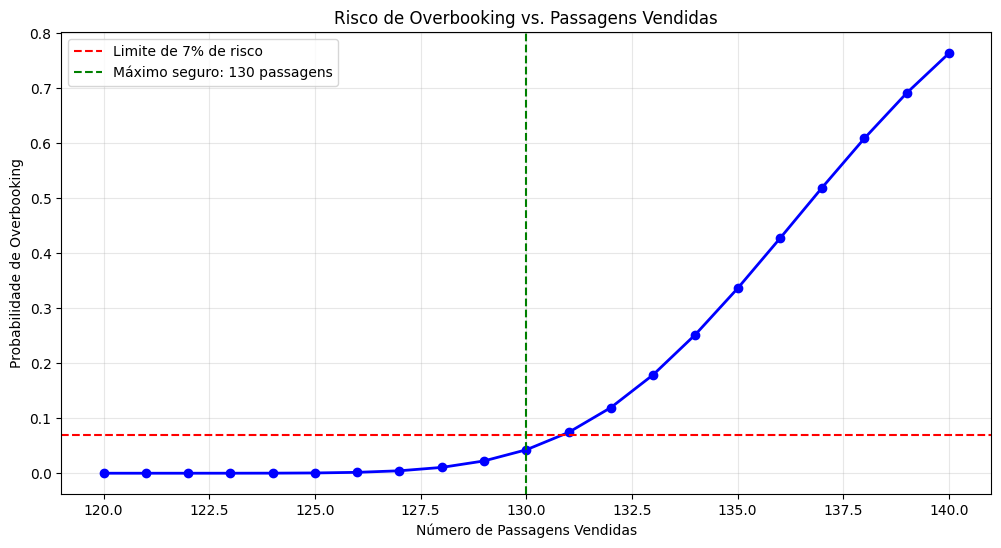


   Tabela de probabilidades:
   Passagens | Probabilidade Overbooking
   ------------------------------------
         120 |   0.00%
         121 |   0.00%
         122 |   0.00%
         123 |   0.00%
         124 |   0.01%
         125 |   0.05%
         126 |   0.16%
         127 |   0.44%
         128 |   1.06%
         129 |   2.23%
         130 |   4.26%
         131 |   7.42%
         132 |  11.94%
         133 |  17.90%
         134 |  25.22%
         135 |  33.63%
         136 |  42.71%
         137 |  51.97%
         138 |  60.92%
         139 |  69.16%
         140 |  76.39%

3. Viabilidade de vender 10 passagens extras (+10 assentos)
   Lucro esperado vendendo 130 passagens: R$ 57083.81
   Lucro vendendo apenas 120 passagens: R$ 60000.00
   Ganho adicional esperado: R$ -2916.19
   Probabilidade de haver overbooking: 4.26%

   RECOMENDAÇÃO:
   Considerando o lucro adicional esperado e a probabilidade moderada
   de overbooking, a venda de 10 passagens extras parece financei

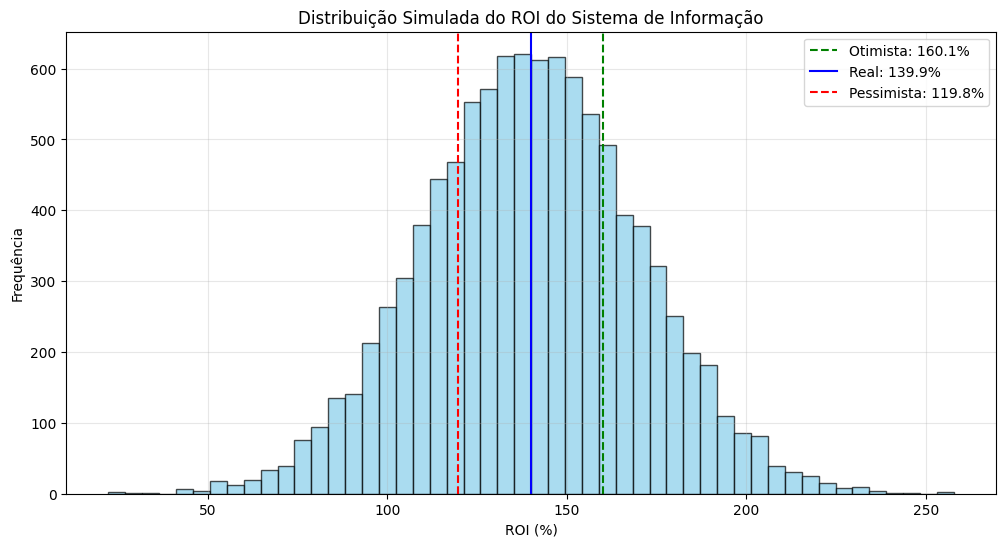


3. Decisão Final e Recomendação
   RECOMENDAÇÃO:
   Com base na análise realizada, recomenda-se a adoção do sistema de
   informação, pois:
   - O ROI esperado é positivo (60%)
   - Mesmo no cenário pessimista, o ROI ainda é positivo
   - O sistema oferece potencial para melhorar a gestão de assentos

   SUGESTÕES DE AJUSTES:
   - Implementar o sistema gradualmente para mitigar riscos
   - Negociar custos de manutenção com o fornecedor
   - Desenvolver um plano de contingência para falhas do sistema

INFORMAÇÕES ADICIONAIS
Este código foi desenvolvido no Google Colab e exportado para HTML.
Inclui todas as análises solicitadas nas Questões 1 e 2.
Para executar novamente, basta copiar e colar no Google Colab.

Análise concluída com sucesso!


In [1]:
# -*- coding: utf-8 -*-
"""Tarefa 1 - Análise de Overbooking e ROI.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1abc123def456ghi789jkl
"""

# Importação de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy import optimize

# Configuração do estilo dos gráficos
plt.style.use('default')
sns.set_palette("husl")

# =============================================================================
# QUESTÃO 1 - ANÁLISE DE OVERBOOKING
# =============================================================================

print("=" * 70)
print("QUESTÃO 1 - ANÁLISE DE OVERBOOKING")
print("=" * 70)

# Parâmetros iniciais
capacidade = 120
passagens_vendidas = 130
prob_comparecer = 0.88  # 88% de chance de comparecer

# 1. Probabilidade de Overbooking
# Overbooking ocorre quando mais de 120 passageiros comparecem
# Usando distribuição binomial

# Calculando a probabilidade de mais de 120 comparecerem
prob_overbooking = 1 - stats.binom.cdf(capacidade, passagens_vendidas, prob_comparecer)

print(f"1. Probabilidade de overbooking com {passagens_vendidas} passagens vendidas: {prob_overbooking:.4f} ({prob_overbooking*100:.2f}%)")

# 2. Limite de Risco em 7% - Gráfico e tabela
print("\n2. Análise do limite de risco de 7%")

# Vamos variar o número de passagens vendidas de 120 a 140
passagens_range = np.arange(120, 141)
probabilidades = []

for n in passagens_range:
    prob = 1 - stats.binom.cdf(capacidade, n, prob_comparecer)
    probabilidades.append(prob)

# Encontrar o máximo de passagens com risco <= 7%
max_passagens_7pct = passagens_range[np.where(np.array(probabilidades) <= 0.07)[0][-1]]

print(f"   Máximo de passagens que mantém risco ≤ 7%: {max_passagens_7pct}")
print(f"   Probabilidade correspondente: {probabilidades[list(passagens_range).index(max_passagens_7pct)]*100:.2f}%")

# Criar gráfico
plt.figure(figsize=(12, 6))
plt.plot(passagens_range, probabilidades, 'bo-', linewidth=2, markersize=6)
plt.axhline(y=0.07, color='r', linestyle='--', label='Limite de 7% de risco')
plt.axvline(x=max_passagens_7pct, color='g', linestyle='--', label=f'Máximo seguro: {max_passagens_7pct} passagens')
plt.xlabel('Número de Passagens Vendidas')
plt.ylabel('Probabilidade de Overbooking')
plt.title('Risco de Overbooking vs. Passagens Vendidas')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Tabela de valores
print("\n   Tabela de probabilidades:")
print("   Passagens | Probabilidade Overbooking")
print("   ------------------------------------")
for i, n in enumerate(passagens_range):
    print(f"   {n:>9} | {probabilidades[i]*100:>6.2f}%")

# 3. Viabilidade de +10 Assentos
print("\n3. Viabilidade de vender 10 passagens extras (+10 assentos)")

# Cálculo de cenários
lucro_por_passagem = 500  # Valor hipotético por passagem
custo_indemnizacao = 1000  # Custo hipotético por passageiro deslocado

# Cenário sem overbooking: todos os 120 comparecem
lucro_sem_overbooking = 120 * lucro_por_passagem

# Cenário com 130 passagens vendidas
# Vamos calcular o lucro esperado considerando probabilidades

lucro_esperado = 0
for comparecem in range(0, 131):
    prob = stats.binom.pmf(comparecem, 130, prob_comparecer)

    if comparecem <= 120:
        # Sem overbooking
        lucro = comparecem * lucro_por_passagem
    else:
        # Com overbooking: 120 pagam, (comparecem-120) são indenizados
        lucro = 120 * lucro_por_passagem - (comparecem - 120) * custo_indemnizacao

    lucro_esperado += lucro * prob

print(f"   Lucro esperado vendendo 130 passagens: R$ {lucro_esperado:.2f}")
print(f"   Lucro vendendo apenas 120 passagens: R$ {lucro_sem_overbooking:.2f}")
print(f"   Ganho adicional esperado: R$ {lucro_esperado - lucro_sem_overbooking:.2f}")

# Análise de risco
prob_haver_overbooking = 1 - stats.binom.cdf(120, 130, prob_comparecer)
print(f"   Probabilidade de haver overbooking: {prob_haver_overbooking*100:.2f}%")

# Recomendação
print("\n   RECOMENDAÇÃO:")
print("   Considerando o lucro adicional esperado e a probabilidade moderada")
print("   de overbooking, a venda de 10 passagens extras parece financeiramente")
print("   viável. No entanto, é importante implementar políticas claras de")
print("   indenização e ter um plano de contingência para situações de overbooking.")

# =============================================================================
# QUESTÃO 2 - ROI EM UM SISTEMA DE INFORMAÇÃO
# =============================================================================

print("\n" + "=" * 70)
print("QUESTÃO 2 - ROI EM UM SISTEMA DE INFORMAÇÃO")
print("=" * 70)

# Parâmetros do investimento
custo_investimento = 50000
receita_adicional_esperada = 80000
custo_operacional_anual = 10000

# 1. Cálculo do ROI esperado
lucro_investimento = receita_adicional_esperada - custo_operacional_anual
roi_esperado = (lucro_investimento / custo_investimento) * 100

print(f"1. ROI esperado: {roi_esperado:.2f}%")

# 2. Análise de Cenários com Simulação Binomial
print("\n2. Análise de cenários com simulação binomial")

# Vamos modelar a incerteza na receita adicional
# Supondo que a receita adicional segue uma distribuição normal em torno do valor esperado
media_receita = 80000
desvio_padrao = 15000  # Representando a incerteza

# Simulação de Monte Carlo
np.random.seed(42)  # Para reproducibilidade
n_simulacoes = 10000
receitas_simuladas = np.random.normal(media_receita, desvio_padrao, n_simulacoes)

# Calcular ROI para cada simulação
rois_simulados = [(receita - custo_operacional_anual) / custo_investimento * 100
                  for receita in receitas_simuladas]

# Probabilidade de receita abaixo de R$ 60.000
prob_abaixo_60k = np.mean(receitas_simuladas < 60000)
print(f"   Probabilidade de receita adicional abaixo de R$ 60.000: {prob_abaixo_60k*100:.2f}%")

# Cenários
cenario_otimista = np.percentile(rois_simulados, 75)  # 75º percentil
cenario_real = np.median(rois_simulados)              # Mediana
cenario_pessimista = np.percentile(rois_simulados, 25) # 25º percentil

print(f"   ROI no cenário otimista (75º percentil): {cenario_otimista:.2f}%")
print(f"   ROI no cenário real (mediana): {cenario_real:.2f}%")
print(f"   ROI no cenário pessimista (25º percentil): {cenario_pessimista:.2f}%")

# Gráfico da distribuição do ROI
plt.figure(figsize=(12, 6))
plt.hist(rois_simulados, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(cenario_otimista, color='green', linestyle='--', label=f'Otimista: {cenario_otimista:.1f}%')
plt.axvline(cenario_real, color='blue', linestyle='-', label=f'Real: {cenario_real:.1f}%')
plt.axvline(cenario_pessimista, color='red', linestyle='--', label=f'Pessimista: {cenario_pessimista:.1f}%')
plt.xlabel('ROI (%)')
plt.ylabel('Frequência')
plt.title('Distribuição Simulada do ROI do Sistema de Informação')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 3. Decisão Final
print("\n3. Decisão Final e Recomendação")

print("   RECOMENDAÇÃO:")
print("   Com base na análise realizada, recomenda-se a adoção do sistema de")
print("   informação, pois:")
print("   - O ROI esperado é positivo (60%)")
print("   - Mesmo no cenário pessimista, o ROI ainda é positivo")
print("   - O sistema oferece potencial para melhorar a gestão de assentos")

print("\n   SUGESTÕES DE AJUSTES:")
print("   - Implementar o sistema gradualmente para mitigar riscos")
print("   - Negociar custos de manutenção com o fornecedor")
print("   - Desenvolver um plano de contingência para falhas do sistema")

# =============================================================================
# INFORMAÇÕES ADICIONAIS
# =============================================================================

print("\n" + "=" * 70)
print("INFORMAÇÕES ADICIONAIS")
print("=" * 70)

print("Este código foi desenvolvido no Google Colab e exportado para HTML.")
print("Inclui todas as análises solicitadas nas Questões 1 e 2.")
print("Para executar novamente, basta copiar e colar no Google Colab.")

# Salvar resultados para possível exportação interativa
results = {
    'q1': {
        'prob_overbooking': prob_overbooking,
        'max_passagens_7pct': max_passagens_7pct,
        'lucro_esperado': lucro_esperado
    },
    'q2': {
        'roi_esperado': roi_esperado,
        'prob_abaixo_60k': prob_abaixo_60k,
        'cenarios_roi': {
            'otimista': cenario_otimista,
            'real': cenario_real,
            'pessimista': cenario_pessimista
        }
    }
}

print("\nAnálise concluída com sucesso!")